# Here, I learn how to use RNA-seq gene expression data for cancer types using Vappiah's tutorial accessible on Youtube and Github

## The goal is to practice using Jupyter notebook, learn Python, and data analysis relevant for Bioinformatics

### Notebook by G. Yagudayeva, November, 2024

### The original data is from: 

### Required libraries are: numpy, matplotlib, seaborn, pandas, and scikit. numpy and pandas are for data handling; matplotlib and seaborn are for data visualization, and scikit are for preprocessing, feature selection, classification, and performance metrics

In [ ]:
#Let's call these libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import label_binarize
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import mutual_info_classif
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import balanced_accuracy_score,f1_score,precision_score, recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import roc_curve,auc
from sklearn.metrics import roc_auc_score

In [ ]:
#Now, let's get the data we will use from a git repo using Vappiah's data for the tutorial

In [17]:
file_url='https://github.com/vappiah/Machine-Learning-Tutorials/raw/main/datasets/cancer_gene_expression.zip'

dataframe=pd.read_csv(file_url)

In [ ]:
#Let's look at the data we just got, what does it look like? Do we need to clean it?

In [ ]:
#We can see the number of samples and features

In [21]:
print(dataframe.shape)

(801, 8001)


In [ ]:
#Now, we can see what the columns look like

In [23]:
print(dataframe.columns[0:3])

Index(['gene_1', 'gene_2', 'gene_3'], dtype='object')


In [ ]:
#How about the last column of this data frame?

In [25]:
dataframe.columns[-1]

'Cancer_Type'

In [ ]:
#What values are missing?

In [27]:
datanul=dataframe.isnull().sum()
g=[i for i in datanul if i>0]

print('columns with missing values:%d'%len(g))

columns with missing values:0


In [ ]:
#How many cancer types are there? or classes?

In [29]:
print(dataframe['Cancer_Type'].value_counts())

Cancer_Type
BRCA    300
KIRC    146
LUAD    141
PRAD    136
COAD     78
Name: count, dtype: int64


In [ ]:
#Let's do some visualization, can we see a bar chart to display the class distribution?

<Axes: xlabel='Cancer_Type'>

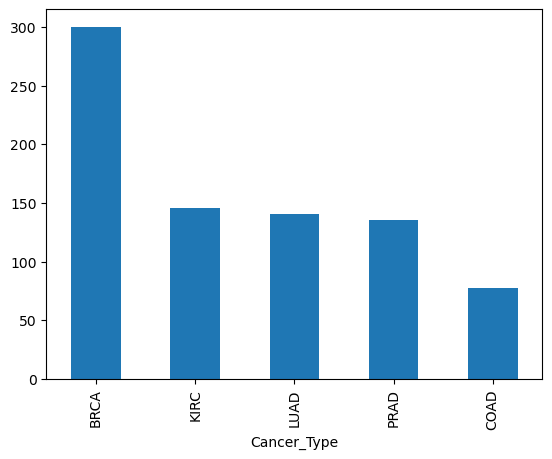

In [31]:
dataframe['Cancer_Type'].value_counts().plot.bar()

### Awesome!! We were able to do a nice visualization for what the class distribution would look like in a bar chart

In [ ]:
#Now, we need to pre-process our data, and put it into the correct format before modelling so we can look at the data besst and most accurately

In [ ]:
#To start, we can separate feature values from the class to satisfy scikit

In [35]:
X=dataframe.iloc[:,0:-1]
y=dataframe.iloc[:,-1]

In [37]:
X.shape

(801, 8000)

In [39]:
y.shape

(801,)

In [ ]:
#When we work with machine learning (ML), we need to encode labels for our data, what does this mean? Well, ML models require input data to be in numeric forms, so we can encode and convert them to be numeric forms of data to conduct future analyses

In [ ]:
#To encode values between 0 and n classes-1 using the labelencoder tool

In [41]:
label_encoder=LabelEncoder()
label_encoder.fit(y)
y_encoded=label_encoder.transform(y)
labels=label_encoder.classes_
classes=np.unique(y_encoded)

In [43]:
labels

array(['BRCA', 'COAD', 'KIRC', 'LUAD', 'PRAD'], dtype=object)

In [45]:
classes

array([0, 1, 2, 3, 4])

In [47]:
#Now, we need to split the data into training and test subsets, because we need the ML to be able to identify iscriminatory paterns to make future predictions. Usually when ML models are generated, they need to be tested on practice data before we use real data

In [ ]:
#split data into training and test sets

In [50]:
X_train,X_test,y_train,y_test=train_test_split(X,y_encoded,test_size=0.2,random_state=42)

In [ ]:
#Now, let's visualize it in the data frame:

In [52]:
dataframe.iloc[:,0:10].describe()

,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,gene_10
count,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000
mean,0.026642,0.231049,0.010844,2.405459,0.005799,0.065640,0.022036,0.028394,0.703998,1.916364
std,0.136850,0.656692,0.153859,0.797236,0.052265,0.213557,0.148917,0.161606,0.779321,0.877010
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,1.898595,0.000000,0.000000,0.000000,0.000000,0.000000,1.357214
50%,0.000000,0.000000,0.000000,2.358284,0.000000,0.000000,0.000000,0.000000,0.518031,1.877862
75%,0.000000,0.000000,0.000000,2.929355,0.000000,0.000000,0.000000,0.000000,1.123931,2.486792
max,1.482332,6.575004,3.778061,4.746646,0.570754,1.866275,2.169925,2.375957,4.541670,4.932231


In [ ]:
#Data normalization must be done to normalize the data to be within the same range and improve bias and ML model performance

In [ ]:
#Let's scale the data between 0 and 1

In [54]:
min_max_scaler=MinMaxScaler()
X_train_norm=min_max_scaler.fit_transform(X_train)
X_test_norm=min_max_scaler.fit_transform(X_test)

In [ ]:
#Before you do ML, another preprocessing step to it is to do feature selection; feature selection is a method to pre-process the data and select relevant featurs for classiciation

In [ ]:
#For our purposes, let's do mutual information algorithm to compute the relevance of each feature with the stop n features to select for our future ML analyses

In [ ]:
#We can do feature selection from mutual information

In [56]:
MI=mutual_info_classif(X_train_norm,y_train)

In [ ]:
#We can select the top n features and let's try to do it 300 (you can modify this number and see how the ML performance changes overtime

In [58]:
n_features=300
selected_scores_indices=np.argsort(MI)[::-1][0:n_features]

In [60]:
X_train_selected=X_train_norm[:,selected_scores_indices]
X_test_selected=X_test_norm[:,selected_scores_indices]

In [62]:
X_train_selected.shape

(640, 300)

In [64]:
X_test_selected.shape

(161, 300)

In [ ]:
#Now we will do the classification, which is the training and testing of the ML model

In [ ]:
#Here, we will use the random forest classifier, which can be used for multiclass and high dimensional data

In [ ]:
#Via model training, we can allow the ML model to learn from the data and identify similar patterns to predict the outcomes of the data it has never sen before; essentially, we are articficially training the model to detect specific patterns

In [ ]:
#Let's use random forest classifier and teach the model to predict each class against the other

In [66]:
RF=OneVsRestClassifier(RandomForestClassifier(max_features=0.2))
RF.fit(X_train_selected,y_train)
y_pred =RF.predict(X_test_selected)
pred_prob = RF.predict_proba(X_test_selected)

In [ ]:
#Now, how well did we train out model? we need to evalute the model and see how good it learned the artifiical intelligence we gave it

In [ ]:
#We will test it using the following metrics: accuracy, precision, recall, f1 score, confusion matrix, and ROC curve

In [ ]:
#Let's test all these and see what we get

In [68]:
accuracy=np.round(balanced_accuracy_score(y_test,y_pred),4)
print('accuracy:%0.4f'%accuracy)
precision=np.round(precision_score(y_test,y_pred,average = 'weighted'),4)
print('precision:%0.4f'%precision)
recall=np.round(recall_score(y_test,y_pred,average = 'weighted'),4)
print('recall:%0.4f'%recall)
f1score=np.round(f1_score(y_test,y_pred,average = 'weighted'),4)
print('f1score:%0.4f'%f1score)
report=classification_report(y_test,y_pred, target_names=labels)
print('\n')
print('classification report\n\n')
print(report)

accuracy:0.9708
precision:0.9815
recall:0.9814
f1score:0.9812


classification report


              precision    recall  f1-score   support

        BRCA       0.97      1.00      0.98        60
        COAD       1.00      0.94      0.97        16
        KIRC       1.00      1.00      1.00        28
        LUAD       0.96      0.92      0.94        24
        PRAD       1.00      1.00      1.00        33

    accuracy                           0.98       161
   macro avg       0.98      0.97      0.98       161
weighted avg       0.98      0.98      0.98       161



In [ ]:
#Now, separate for the confusion matrix (visualized by seaborn)

In [80]:
cm=confusion_matrix(y_test,y_pred)
cm_df=pd.DataFrame(cm,index=labels,columns=labels)

In [78]:
cm_df

,BRCA,COAD,KIRC,LUAD,PRAD
BRCA,60,0,0,0,0
COAD,0,15,0,1,0
KIRC,0,0,28,0,0
LUAD,2,0,0,22,0
PRAD,0,0,0,0,33


In [ ]:
#visualize via seaborn

Text(50.722222222222214, 0.5, 'True Labels')

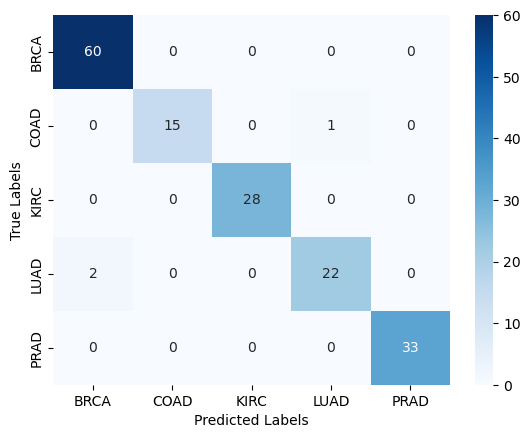

In [74]:
sns.heatmap(cm_df,annot=True,cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

In [ ]:
#visualize matrix directly

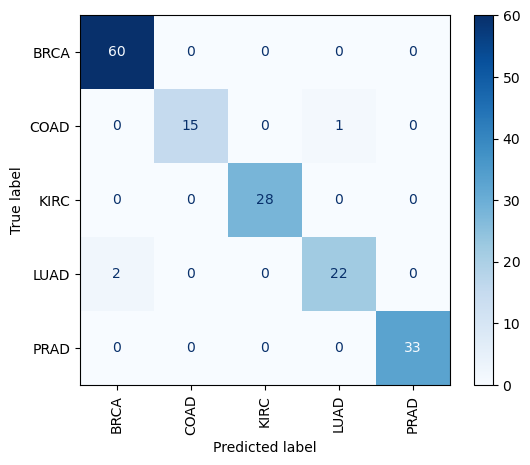

In [86]:
from sklearn.metrics import ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay.from_estimator(
    estimator=RF,  # Replace with your trained model
    X=X_test_selected,  # Test data
    y=y_test,  # True labels
    display_labels=labels,
    cmap='Blues',
    xticks_rotation='vertical'
)

In [96]:
#now, let's play around with ROC curves and generate 1 for each class
#We will have to binarize the y_test labels because the probabilities(pred_prob) are calculated for each each class and need to match the formatting

In [102]:
y_test_binarized=label_binarize(y_test,classes=classes)    

In [106]:
from sklearn.metrics import roc_curve, auc

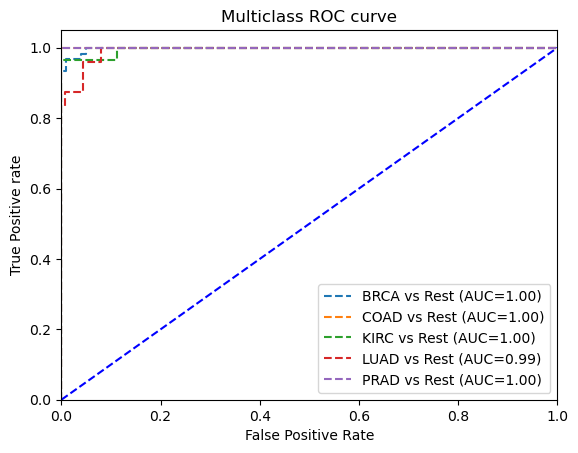

In [110]:
fpr = {}
tpr = {}
thresh ={}
roc_auc = dict()

n_class = classes.shape[0]

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test_binarized[:,i], pred_prob[:,i])
    roc_auc[i] = auc(fpr[i], tpr[i])

    plt.plot(fpr[i], tpr[i], linestyle='--', 
             label='%s vs Rest (AUC=%0.2f)'%(labels[i],roc_auc[i]))

plt.plot([0,1],[0,1],'b--')
plt.xlim([0,1])
plt.ylim([0,1.05])
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='lower right')
plt.show()